# **INTRODUCTION TO BASIC IMAGE PROCESSING**
---
## **INTRO**
This is simple introduction to image processing in python. This *Google Colab* notebook is fully interactive and you can run it yourself. Today you will learn 3 basic principles in image processing:
1. What is image?
  * how image is stored
  * how image is perceived
  * basic programming and linear algebra
2. what is image processing?
  * types of operations on image
  * image transformation
    * chanel transformation
    * intensity transformation
    * convolution 
3. Advanced topics:
  * Face detection
  * Convolutional Neural Networks:
  * Computer Vision

---
# **What is image?**

Image is 2 dimensional an array (matrix) of pixels, with 3 chanels (red, green,blue) with 8-bits of value for each chanel in single pixel. 

for example:
Here is 8bit data: (0000 0111) <base 2>  == 7 <base 10>

(1111 1111)<base 2> == 255 <base 10>

(0000 0000)<base 2> == 0 <base 10>

3chanels = ((0000 0000),(1111 1111),(1000 0111)) == (0,255,7)  

above number certain color!

If you wonder what is this color? Run the next code:

In [ ]:
# everything after # is a comment! 

import cv2 #library for opencv (OPEN SOURCE COMPUTER VISION)
import numpy as np # library of numpy - numerical python 
from matplotlib import pyplot as plt # python library to plot images or data in a nice format: 

im = np.zeros((10,20,3),np.uint8) # creats height = 10 by width = 20 image, with 3 chanels (red,green,blue) , with 8-bit data 

for i in range(10):
  for j in range(20):
    im[i,j,:] = [0,255,7]

plt.imshow(im) 

# YAY! WHO have thought! This is green image!

Red= 0; (min) 

Green = 255 (max)

Blue = 7 (little bit)

so output image is green. You can play around and assign different value than [0,255,7]. Try for example [255,0,0].


---
How image is stored? Lets download something else and see what happens. Here you can see how to directly download image to your google colab from remote URL:

In [ ]:
#this code gets image from below url and stores it in the name " dt.jpg. ".  
!wget "https://static6.depositphotos.com/1167801/651/i/950/depositphotos_6517777-stock-photo-rainbow-of-colorful-boxes.jpg" -O dt.jpg

--2020-12-11 13:15:18--  https://static6.depositphotos.com/1167801/651/i/950/depositphotos_6517777-stock-photo-rainbow-of-colorful-boxes.jpg
Resolving static6.depositphotos.com (static6.depositphotos.com)... 23.199.163.120
Connecting to static6.depositphotos.com (static6.depositphotos.com)|23.199.163.120|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 88693 (87K) [image/jpeg]
Saving to: ‘dt.jpg’

dt.jpg              100%[===================>]  86.61K  --.-KB/s    in 0.02s   

2020-12-11 13:15:18 (3.47 MB/s) - ‘dt.jpg’ saved [88693/88693]



Keep in mind: there are different formats to store images. They divide in 2 types: 
  1. Lossless - no data is lost (.png, .RAW, .BMP )
  2. Lossy - data might get corrupted (.jpg, .JPEG, .WebP)

Why use both? 
Lossless images are expensive in memory: some images are can get up to 1-10 GB.
Lossy images get corrupted - after many copies image becomes too corruped.

#Example of Image corruption:
<img src ="https://i.stack.imgur.com/U7Q3A.jpg" width="400px" height = "300px">

#Compression artifact of JPEG after several iteration:
<img src ="https://hsto.org/webt/oa/dz/7l/oadz7ljyuu-vouck3fsoafeulis.jpeg" width="700px" height = "200px">


###Lets open image. In order to open it, we will use opencv functionality. Here is how you open the image:

---

In [ ]:
img = cv2.imread('./dt.jpg')
plt.imshow(img)
plt.show()

##HOW TO FIND THE SIZE OF THE IMAGE?

its all right. Opencv already has interface for that:

In [ ]:
print(img.shape) #prints as output the size of your image

(682, 1023, 3)


#**2. IMAGE PROCESSING**

### This is interesting part of the tutorial. I will show you how to perform some operations on images. There are 3 types of operations you can do on images. 

### 1. ***Image cropping and Rotation***

It is pretty easy task, but you should understand how images are actually cropped and resized by the avaiable tools in programs like *Photoshop* or *Krita*. 

Image "dt.jpg" that we downloaded is of size (682,1023,3), for height,width and number of chanels. Lets see what happens if we crop half of the image:

In [ ]:
H,W = img.shape[:2]
new_image = np.zeros((H,int(W/2),3),np.uint8)
for i in range(H):
  for j in range(int(W/2)):
    new_image[i,j] = img[i,j]

plt.imshow(new_image)
plt.show()
plt.imshow(img)
plt.show()

###Image Rotation For 90 degrees clockwise:

In [ ]:
H,W = img.shape[:2]
new_image = np.zeros((W,H,3),np.uint8)
for i in range(H):
  for j in range(W):
    new_image[j,i] = img[i,j]
plt.figure(figsize = (6,6))
plt.imshow(new_image)
plt.show()
plt.imshow(img)
plt.show()

# **Pixelwise operations:**
#### This operations are performed equally on each pixel of the image. As you may wonder, how can you create gray-scale (black and white) image? This operation is done by pixel-wise operation! Here is example:
---
### *** Gray scale Image:*** 

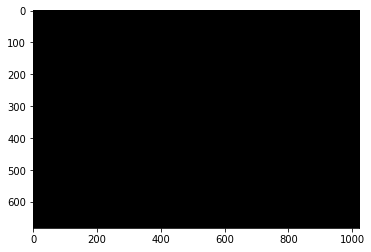

In [ ]:
# first generate fully black image:

H,W = img.shape[:2]
gray = np.zeros((H,W), np.uint8)
plt.imshow(gray,cmap="gray")

#### Naive Gray Scale Image: tage *grayscale_channel = (red_chanel + blue_chanel + green_chanel) / 3*


In [ ]:
# Naive Gray Scale Image: tage grayscale_channel = red_pixel
for i in range(H):
  for j in range(W):
    gray[i,j] = np.clip( img[i,j,0]/3.0  +  img[i,j,1]/3.0 +  img[i,j,2]/3.0, 0, 255)
  
plt.imshow(gray,cmap="gray")
plt.show()
plt.imshow(img)
plt.show()

<img src= "https://i.imgur.com/EaaHUWF.jpg" width = "200px" height = "200px">

#WE LOST OUR COLORS!!!!

The reason is that if you take average of all 3 chanels, then it becomes indistinguishable from each other. However, there are several ways to get around it. One of them is instead of assigning each chanel multiplier of *1/3* we can give different values as in the following example:

In [ ]:
for i in range(H):
  for j in range(W):
    gray[i,j] = np.clip(0.07 * img[i,j,0]  + 0.72 * img[i,j,1] + 0.21 * img[i,j,2], 0, 255)

plt.imshow(gray,cmap="gray")
plt.show()
plt.imshow(img)
plt.show()

#YAY, WE PRESEVED THE COLOR INFORMATION !!!
####Almost

###There are other Interesting operations, for example [Histogram equalization](https://en.wikipedia.org/wiki/Histogram_equalization)

# **Convolution**

###This is going to be fun. You may have already heard this word many times, so its finally time to understand [what it means](https://en.wikipedia.org/wiki/Convolution)

####In image processing, convolution is special type of operation. In order to perform operation, the image is multiplied by ***filter*** also called ***kernel***. kernel is also an image, but often of smaller size. for example, it can be image of size (2,2,3) - simplest kernel. 

#### Above example of pixelwise multiplication is also Convolution operation with kernel size (1,1,3). values of the kernel is:

#### k(0,0,0) = 0.07  
#### k(0,0,1) = 0.72 
#### k(0,0,2) = 0.21

### Here is visual demonstration of convolution operation on single chanel image: 
![](http://d2l.ai/_images/correlation.svg)

###Kernel is :

#### k(0,0,0) = 0  
#### k(0,1,0) = 1 
#### k(1,0,0) = 2
#### k(0,1,0) = 3

### Here is function to perform convolution operation: 

In [ ]:
def convolution(image,kernel):
  (H,W) = image.shape[:2]
  (kH,kW) = kernel.shape[:2]
  
  pad = (kW-1)//2

  image = cv2.copyMakeBorder(image, pad, pad, pad, pad, cv2.BORDER_REPLICATE)
  output = np.zeros((H, W), dtype="float32")
  for y in np.arange(pad, H + pad):
    for x in np.arange(pad, W + pad):
      regionOfInteset = image[y - pad:y + pad + 1, x - pad:x + pad + 1]
      convolutionPixel = (regionOfInteset * kernel).sum()
      output[y - pad, x - pad] = np.clip(convolutionPixel,0,255)

  #output = rescale_intensity(output, in_range=(0, 255))
  output = (output).astype("uint8")
  return output

### Here is example on how to use it:

In [ ]:
smallBlur = np.ones((7, 7), dtype="float") * (1.0 / (7 * 7))
bigBlur = np.ones((21, 21), dtype="float") * (1.0 / (21 * 21))

smallBlurry = convolution(gray,smallBlur)
bigBluryy = convolution(gray,bigBlur)


In [ ]:
plt.imshow(gray,cmap="gray")
plt.show()
plt.imshow(smallBlurry,cmap="gray")
plt.show()
plt.imshow(bigBluryy,cmap="gray")
plt.show()

###With convolution, you can do something more abstract. For example, you can find vertical lines and horizontal lines in image:

In [ ]:
# construct the Sobel x-axis kernel
sobelX = np.array((
	[-1, 0, 1],
	[-2, 0, 2],
	[-1, 0, 1]), dtype="int")
# construct the Sobel y-axis kernel
sobelY = np.array((
	[-1, -2, -1],
	[0, 0, 0],
	[1, 2, 1]), dtype="int")

horisontalEdgeFinder = convolution(gray,sobelX)
verticalEdgeFinder = convolution(gray,sobelY)

plt.imshow(gray,cmap="gray")
plt.show()
plt.imshow(horisontalEdgeFinder,cmap="gray")
plt.show()
plt.imshow(verticalEdgeFinder,cmap="gray")
plt.show()

### Higher intensity means the lines are "more vertical" or "more horizontal".

# ADVANCED TOPICS IN IMAGE PROCESSING:

## ***1. Face detection***

####It is contr-intuitive, but face detection is also done using convolution operation. Here is example of face detection kernels:

![](https://www.machinelearningmastery.ru/img/0-116498-321743.png)

Rough idea of how face detection works:

1. Each kernel returns position of some feature (eyes, eyebrows, nose, mouse)
2. Each of 20 kernels create a single channel
3. all channels are merged to single 20-channel image (instead of 3-chanel rgb)
4. then, single kernel of size (N,N,20) applied to total image.
    * This kernel basically needs perfect combination for each values. It is hard to design, but idea is that you need 2 yes, one nose and one mouth to detect face


# **Convolutional Neural Network**

##You may already notised something:

#*ALL IMAGE BASED OPERATIONS ARE CONVOLUTIONS!*

### Insight for CNN:
1. Finding/Design of kernel values are hard task
2. Almost every image transformation is convolution operation
3. Machine learning can be used to find appropriate filters (kernels!). 

##Here is Architecture of Alex-net:
![](https://www.researchgate.net/profile/Walid_Aly/publication/312188377/figure/fig4/AS:448996423540740@1484060497977/An-illustration-of-the-architecture-of-AlexNet-CNN-14.png)

#COMPUTER VISION

###Computer vision tries to solve this problem: 
###*How to make computers understand what is depicted on image?* 

###or 
###*How to make computers perceive and understand the world?*



<iframe width="560" height="315" src="https://www.youtube.com/embed/7ztK5AhShqU" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>


In [ ]:
from IPython.display import HTML

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/7ztK5AhShqU" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')